<a href="https://colab.research.google.com/github/caexequiel/caexequiel/blob/main/Repaso_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

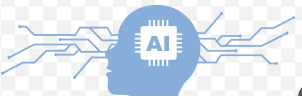

Repaso Numpy

La forma en que pensamos en listas es como secuencias de elementos, no como en vectores o matrices. Podemos aproximarnos a la idea de una matriz numérica utilizando listas dentro de listas, como muestra el siguiente ejemplo:

In [ ]:
a = [[2,5,1],[3,10,12],[2,0,0]]
print(a[0][0])
print(a[1][2])

2
12


Es decir, esta lista se llama con dos índices i,j de forma tal que representa a la siguiente matriz:

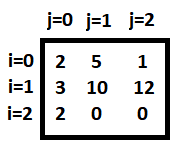

El problema con esto es que las funciones y métodos de Python no se comportan como esperaríamos si estas fuesen matrices. Por ejemplo, la operación suma no devuelve la suma elemento a elemento, sino la concatenación de la listas:

In [ ]:
a = [[2,5,1],[3,10,12],[2,0,0]]
b = [[2,5,1],[3,10,12],[2,0,0]]
print(a+b)

[[2, 5, 1], [3, 10, 12], [2, 0, 0], [2, 5, 1], [3, 10, 12], [2, 0, 0]]


Pero no todo está perdido. La librería de Python llamada Numpy se inventó precisamente para poder transformar listas en vectores y listas de listas en matrices, de forma tal que cumplan con nuestras intuiciones de álgebra lineal.

In [ ]:
import numpy as np
a = np.array([[2,5,1],[3,10,12],[2,0,0]])
b = np.array([[2,5,1],[3,10,12],[2,0,0]])
print(a+b)
print(type(a))


[[ 4 10  2]
 [ 6 20 24]
 [ 4  0  0]]
<class 'numpy.ndarray'>


Es importante notar que Numpy trabaja con datos numéricos y que por lo tanto podemos encontrar un error si intentamos operar aritméticamente con cualquier array.

In [ ]:
a = np.array(['hola', 'mundo'])
b = np.array(['como', 'va'])
print(a+b)

UFuncTypeError: ignored

También es importante que las dimensiones sean consistentes con las operaciones que queremos realizar.

In [ ]:
a = np.array([[2,5,1],[3,10,12],[2,0,0]])
b = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])

# estas operaciones entre matrices son válidas
print(a+a)
print(a*a)

# estas operaciones son invalidas
print(a+b)
print(a*b)
print(b*a)

[[ 4 10  2]
 [ 6 20 24]
 [ 4  0  0]]
[[  4  25   1]
 [  9 100 144]
 [  4   0   0]]


ValueError: ignored

Notar que la operación de multiplicación actúa elemento a elemento. Por eso es imposible hacer el producto elemento a elemento de un array de $3 \times 3$ por uno de $4 \times 3$, no importa en que orden lo pongamos.

Para hacer producto interno de matrices, usamos dot:

In [ ]:
print(np.dot(b,a))

[[ 21  60  62]
 [ 60 115 123]
 [  4  10   2]
 [ 70 150 130]]


Obviamente, el orden opuesto da error:
la cantidad de columnas de la primera matriz debe coincidir con la catidad de columnas de la segunda


In [ ]:
print(np.dot(a,b))

ValueError: ignored

¿Qué pasa con los arrays unidimensionales? ¿Entiende automáticamente Numpy que un array puede ser de $1 \times n$ o de $n \times 1$ dependiendo del producto que yo quiero hacer?

In [ ]:
a = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])
b = np.array([1,2,3])
c = np.array([1,2,3,4])
print(np.dot(a,b))
print(np.dot(c,a))

[15 59  2 60]
[54 65 65]


Aparentemente sí.
¿Cómo podemos obtener la dimensión de un array? Usamos el método array.shape()

la función  tiene el mismo nombre que pandas
diferencia devuelve tupla

In [ ]:
print(a.shape)
print(b.shape)
print(c.shape)

(4, 3)
(3,)
(4,)


También podemos transponer con np.transpose()
intercambia filas con columnas

In [ ]:
print(a)
print(np.transpose(a))

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]]
[[ 2  3  2 10]
 [ 5 10  0 10]
 [ 1 12  0 10]]


Además, podemos concatenar matrices siempre que elijamos dimensiones consistenes para hacerlo. Para eso, primero formamos una tupla (...,...,...) y después usamos np.concatenate indicando el eje (0=filas, 1=columnas).   AXIS son los ejes Por ejemplo:

In [ ]:
a = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])
b = np.array([[2,5,1],[3,10,12],[2,0,0]])

print(np.concatenate((a,b),axis=0))
print(np.concatenate((b,b),axis=1))

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]
 [ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]]
[[ 2  5  1  2  5  1]
 [ 3 10 12  3 10 12]
 [ 2  0  0  2  0  0]]


Podemos elegir sub-matrices usando slicing de forma similar a cómo lo hicimos con listas:

In [ ]:
print(a)
print(a[1:3,0:3])

[[ 2  5  1]
 [ 3 10 12]
 [ 2  0  0]
 [10 10 10]]
[[ 3 10 12]
 [ 2  0  0]]


Además, podemos seleccionar filas o columnas enteras usando : solo,

In [ ]:
print(a[:,1])
print(a[1,:])

[ 5 10  0 10]
[ 3 10 12]


A veces es importante averiguar los índices de un array donde se cumple una determinada condición. Eso puede hacerse con la función np.where() de Numpy:

In [ ]:
a = np.array([[2,5,1],[3,10,12],[2,0,0],[10,10,10]])
np.where(a>1)

(array([0, 0, 1, 1, 1, 2, 3, 3, 3]), array([0, 1, 0, 1, 2, 0, 0, 1, 2]))

Esto podemos usarlo directamente para indexar el array y extraer los valores que cumplen con la condición pedida:

In [ ]:
a[np.where(a>1)]

array([ 2,  5,  3, 10, 12,  2, 10, 10, 10])

Otra forma de hacerlo es con indexado booleano:

In [ ]:
a[a>1]

array([ 2,  5,  3, 10, 12,  2, 10, 10, 10])

Si tenemos varias condiciones podemos usar operadores lógicos:

In [ ]:
a[a>1 and a<9]

ValueError: ignored

No es tan sencillo como parecia. Cuando tenemos arrays con más de un elemento, tenemos que usar las funciones np.logical_and() y np.logical_or():

In [ ]:
print(a>1)
print(a<9)
print(np.logical_and(a>1,a<9))
print(np.logical_or(a>1,a<9))
print(a[np.logical_and(a>1,a<9)])

[[ True  True False]
 [ True  True  True]
 [ True False False]
 [ True  True  True]]
[[ True  True  True]
 [ True False False]
 [ True  True  True]
 [False False False]]
[[ True  True False]
 [ True False False]
 [ True False False]
 [False False False]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[2 5 3 2]


Hay algunos arrays predefinidos útiles que Numpy puede generar por nosotros, por ejemplo, arrays llenos de 0's o 1's con una forma determinada, o la matriz identidad. Notar que las dimensiones se le pasan como una tupla (...,...,...):

In [ ]:
print(np.zeros((2,5)))
print(np.ones((2,5)))
print(np.eye(7))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


Por último, si tenemos un archivo de datos del tipo .csv (comma separated values) podemos leerlo fácilmente con Numpy.

Para eso,  estoy cargando datos que tengo en mi  Drive en una Carpeta que denominé AA_Datos01  'ejemplo_csv_clase_2.csv' Es un pequeño archivo el cual comparto el enlace
https://drive.google.com/file/d/1pDQsyrB3J7OoadraVXbF8LfW13svm4jh/view?usp=sharing


 Procedemos a montar el drive y cargar el archivo .csv como una matrix:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/AA_Datos01/ejemplo_csv_clase_2.txt'




from numpy import genfromtxt
a = genfromtxt(filename, delimiter=',')

print(a)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[  1.     2.23    nan]
 [  3.      nan 123.  ]
 [  0.     0.     0.  ]]


Notamos que las entradas que tenían strings fueron cargadas como nan = "not a number"

La forma en que vamos a cargar datasets consistentes de datos heterogéneos en Python es mediante Pandas, una librería para análisis de datos en Python, en particular usando dataframes.